# Celda 1 — Importación y configuración

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Estilo gráfico
plt.rcParams["figure.figsize"] = (7, 5)
plt.rcParams["figure.dpi"] = 120

# Reproducibilidad
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Ruta del dataset
DATA_PATH = Path("../data/raw/structured_endometriosis_data.csv")
print("Ruta del dataset:", DATA_PATH)


Ruta del dataset: ..\data\raw\structured_endometriosis_data.csv


# Celda 2 — Carga y preparación de los datos

In [2]:
df = pd.read_csv(DATA_PATH)
print("Dataset cargado correctamente.")
print("Forma:", df.shape)

TARGET = "Diagnosis"
assert TARGET in df.columns, "No se encontró la columna objetivo."

# Seleccionamos solo variables numéricas
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
if TARGET in num_cols:
    num_cols.remove(TARGET)

# Imputación simple (mediana)
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

X = df[num_cols].copy()
y = df[TARGET].astype(int)

print("Variables numéricas utilizadas en el PCA:", len(num_cols))
display(df[num_cols].head())


Dataset cargado correctamente.
Forma: (10000, 7)
Variables numéricas utilizadas en el PCA: 6


,Age,Menstrual_Irregularity,Chronic_Pain_Level,Hormone_Level_Abnormality,Infertility,BMI
0,24,1,8.361531,0,0,19.451314
1,37,1,4.995508,0,0,22.388436
2,46,1,3.363996,1,0,21.320443
3,32,1,5.246037,0,0,20.177715
4,28,1,3.898932,1,0,23.538103


# Celda 3 — Escalado y aplicación del PCA

In [3]:
# Escalar las variables numéricas (importante para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA con 2 componentes principales
pca = PCA(n_components=2, random_state=RANDOM_STATE)
Z = pca.fit_transform(X_scaled)

# Mostrar varianza explicada
var_exp = pca.explained_variance_ratio_
print(f"Varianza explicada por PC1: {var_exp[0]:.3f}")
print(f"Varianza explicada por PC2: {var_exp[1]:.3f}")
print(f"Varianza total explicada: {var_exp.sum():.3f}")


Varianza explicada por PC1: 0.171
Varianza explicada por PC2: 0.170
Varianza total explicada: 0.341


# Celda 4 — Visualización: PCA 2D coloreado por Diagnosis

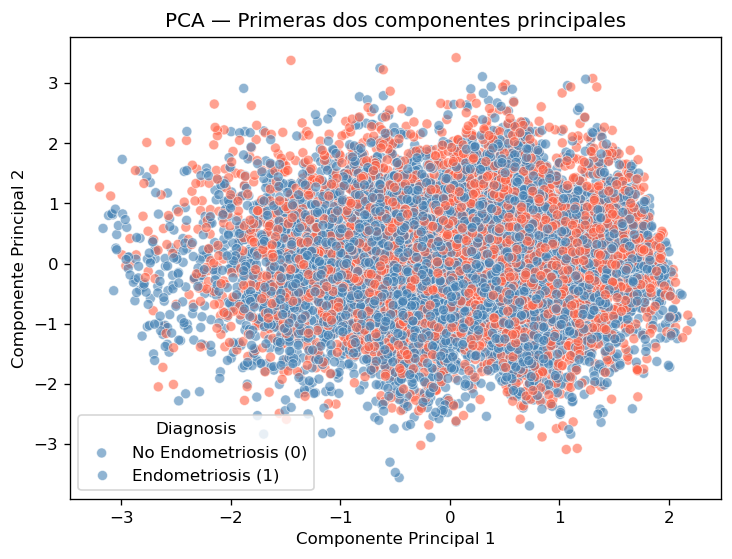

In [4]:
pca_df = pd.DataFrame({
    "PC1": Z[:, 0],
    "PC2": Z[:, 1],
    "Diagnosis": y
})

sns.scatterplot(
    data=pca_df,
    x="PC1", y="PC2",
    hue="Diagnosis",
    palette={0: "steelblue", 1: "tomato"},
    alpha=0.6
)
plt.title("PCA — Primeras dos componentes principales")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Diagnosis", labels=["No Endometriosis (0)", "Endometriosis (1)"])
plt.show()


# Celda 5 — Cargas (importancia de cada variable en las componentes)

In [5]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2"],
    index=num_cols
)

print("Cargas de las variables (contribución de cada variable a las componentes):")
display(loadings.sort_values("PC1", key=lambda s: s.abs(), ascending=False).head(10))
display(loadings.sort_values("PC2", key=lambda s: s.abs(), ascending=False).head(10))


Cargas de las variables (contribución de cada variable a las componentes):


,PC1,PC2
Menstrual_Irregularity,0.573253,0.131476
Infertility,-0.529905,0.096563
Age,-0.424397,-0.517974
Hormone_Level_Abnormality,0.416466,-0.240470
BMI,-0.188882,0.677328
Chronic_Pain_Level,-0.036722,0.434158


,PC1,PC2
BMI,-0.188882,0.677328
Age,-0.424397,-0.517974
Chronic_Pain_Level,-0.036722,0.434158
Hormone_Level_Abnormality,0.416466,-0.240470
Menstrual_Irregularity,0.573253,0.131476
Infertility,-0.529905,0.096563


# Celda 6 — Interpretación básica

Interpretación del PCA:

• Cada punto del gráfico representa un registro (paciente simulado).
• Las componentes PC1 y PC2 son combinaciones lineales de las variables originales
  que capturan la mayor parte de la varianza de los datos.

Si se observan agrupamientos o separaciones claras entre las clases (Diagnosis 0 y 1),
puede indicar que existe una estructura o patrón natural en los datos.

El PCA no usa la variable objetivo para calcular las componentes,
por lo que solo sirve como una herramienta EXPLORATORIA.

En este proyecto, el PCA se usa para:
  - Detectar posibles colinealidades entre variables numéricas.
  - Explorar si hay separación visual entre los diagnósticos.
  - Complementar el análisis previo antes del modelado final.

> El PCA se aplicó con fines **exploratorios**, no predictivos, 
> para identificar posibles **colinealidades** y **patrones de agrupamiento** 
> entre variables clínicas antes del modelado final.


